In [84]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = r"C:\Users\SAGAR\Downloads\churn_dataset.csv"

In [3]:
cdf1=pd.read_csv(path)

## Data frame

In [4]:
cdf1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
cdf1['TotalCharges'] =pd.to_numeric(cdf1['TotalCharges'],errors= 'coerce')

In [7]:
cdf1.drop(['customerID'],axis=1,inplace=True)

In [8]:
cdf1.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
cdf= cdf1.dropna(inplace=True)

In [10]:
cdf.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [53]:
cdf['SeniorCitizen'] = cdf['SeniorCitizen'].astype(object)

C:\Users\SAGAR\AppData\Local\Temp\ipykernel_25252\1841159290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['SeniorCitizen'] = cdf['SeniorCitizen'].astype(object)


In [54]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [14]:
cdf.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Spliting outputs and inputs

In [15]:
y=cdf['Churn']
X=cdf[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']]

In [16]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [17]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


# Spliting the data into train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 3540 to 2737
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5274 non-null   object 
 1   SeniorCitizen     5274 non-null   object 
 2   Partner           5274 non-null   object 
 3   Dependents        5274 non-null   object 
 4   tenure            5274 non-null   int64  
 5   PhoneService      5274 non-null   object 
 6   MultipleLines     5274 non-null   object 
 7   InternetService   5274 non-null   object 
 8   OnlineSecurity    5274 non-null   object 
 9   OnlineBackup      5274 non-null   object 
 10  DeviceProtection  5274 non-null   object 
 11  TechSupport       5274 non-null   object 
 12  StreamingTV       5274 non-null   object 
 13  StreamingMovies   5274 non-null   object 
 14  Contract          5274 non-null   object 
 15  PaperlessBilling  5274 non-null   object 
 16  PaymentMethod     5274 non-null   objec

# Data preprocessing

In [20]:
X_train_num = X_train.select_dtypes(include=['int64','float64'])
X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
3540,72,108.65,7726.35
3504,68,19.95,1377.70
6715,11,89.20,990.30
2866,12,84.60,1017.35
6609,1,20.10,20.10


In [21]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3540,Female,0,Yes,Yes,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic)
3504,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
6715,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
2866,Female,0,No,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check
6609,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check


In [22]:
from sklearn.preprocessing import StandardScaler  # importing of standardscaler from sklearn.preprocessing
scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), # transforming of numerical data and creating of dataframe for transformed data
                                       columns= X_train_num.columns,
                                       index=X_train_num.index)
X_train_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
3540,1.628149,1.460662,2.416469
3504,1.464856,-1.495682,-0.392705
6715,-0.862073,0.812400,-0.564123
2866,-0.821250,0.659083,-0.552154
6609,-1.270306,-1.490683,-0.993420


In [23]:
from sklearn.preprocessing import OneHotEncoder # importing of OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)
X_train_cat = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns = encoder.get_feature_names_out(X_train_cat.columns),
                               index = X_train_cat.index) #transforming of catagorical data and creating of dataframe for transformed data
X_train_cat.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [55]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat],axis=1)
X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3540,1.628149,1.460662,2.416469,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3504,1.464856,-1.495682,-0.392705,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6715,-0.862073,0.812400,-0.564123,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2866,-0.821250,0.659083,-0.552154,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6609,-1.270306,-1.490683,-0.993420,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
X_test_num = X_test.select_dtypes(include=['int64','float64'])
X_test_num.head()

,tenure,MonthlyCharges,TotalCharges
5561,1,20.65,20.65
5814,16,20.60,330.25
2645,1,19.80,19.80
3983,1,24.25,24.25
6438,1,74.40,74.40


In [57]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5561,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check
5814,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic)
2645,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic)
3983,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
6438,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [58]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), # transforming of numerical data and creating of dataframe for transformed data
                                       columns= X_test_num.columns,
                                       index=X_test_num.index)
X_test_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
5561,-1.270306,-1.472352,-0.993177
5814,-0.657957,-1.474018,-0.856184
2645,-1.270306,-1.500682,-0.993553
3983,-1.270306,-1.352365,-0.991584
6438,-1.270306,0.319120,-0.969394


In [59]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                             columns=encoder.get_feature_names_out(X_test_cat.columns),
                             index=X_test_cat.index)
X_test_cat_ohe.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [60]:
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5561,-1.270306,-1.472352,-0.993177,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5814,-0.657957,-1.474018,-0.856184,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2645,-1.270306,-1.500682,-0.993553,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3983,-1.270306,-1.352365,-0.991584,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6438,-1.270306,0.319120,-0.969394,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# LogisticRegression

In [61]:
from sklearn.linear_model import LogisticRegression
LD_classifier = LogisticRegression()
LD_classifier.fit(X_train_transformed,y_train)

LogisticRegression()

In [62]:
y_test_pred_LD = LD_classifier.predict(X_test_transformed)

### Evaluation

In [63]:
from sklearn import metrics
LD = metrics.accuracy_score(y_test,y_test_pred_LD)
LD

0.8122866894197952

# DecisionTree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier=DecisionTreeClassifier()
DT_classifier.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [65]:
y_test_pred_DT = DT_classifier.predict(X_test_transformed)

### Evaluation

In [66]:
DT = metrics.accuracy_score(y_test,y_test_pred_DT)
DT

0.7394766780432309

# KNeighbors Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
KN_classifier=KNeighborsClassifier()
KN_classifier.fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [68]:
y_test_pred_KN= KN_classifier.predict(X_test_transformed)

### Evaluation

In [69]:
KN = metrics.accuracy_score(y_test,y_test_pred_KN)
KN

0.7656427758816837

# RandomForest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier=RandomForestClassifier()
RF_classifier.fit(X_train_transformed,y_train)

RandomForestClassifier()

In [71]:
y_test_pred_RF= RF_classifier.predict(X_test_transformed)

### Evaluation

In [72]:
RF = metrics.accuracy_score(y_test,y_test_pred_RF)
RF

0.7935153583617748

# Supportvector Classifier

In [73]:
from sklearn.svm import SVC
SVC_classifier = SVC()
SVC_classifier.fit(X_train_transformed,y_train)

SVC()

In [74]:
y_test_pred_SVC= SVC_classifier.predict(X_test_transformed)

### Evaluation

In [75]:
SVC = metrics.accuracy_score(y_test,y_test_pred_SVC)
SVC

0.8111490329920364

# GradientBoosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT_classifier = GradientBoostingClassifier()
GBDT_classifier.fit(X_train_transformed,y_train)

GradientBoostingClassifier()

In [77]:
y_test_pred_GBDT= GBDT_classifier.predict(X_test_transformed)

### Evaluation

In [78]:
GBDT = metrics.accuracy_score(y_test,y_test_pred_GBDT)
GBDT

0.8094425483503982

# AdaBoost Classifier

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ADA_classifier = AdaBoostClassifier()
ADA_classifier.fit(X_train_transformed,y_train)

AdaBoostClassifier()

In [80]:
y_test_pred_ADA= ADA_classifier.predict(X_test_transformed)

### Evaluation

In [81]:
ADA = metrics.accuracy_score(y_test,y_test_pred_ADA)
ADA

0.810580204778157

In [82]:
data = [['Logistic Classifier',LD],
       ['KNN Classifier',KN],
       ['Decision Tree Classifier',DT],
       ['Random Forest Classifier',RF],
       ['Support vector Machines',SVC],
       ['Gradient Boosting Decision Tree Classifier',GBDT],
       ['AdaBoostClassifier',ADA]]
ACCURACY = pd.DataFrame(data,columns = ['Algorithm','Accuracy_Score'])

In [83]:
ACCURACY

,Algorithm,Accuracy_Score
0,Logistic Classifier,0.812287
1,KNN Classifier,0.765643
2,Decision Tree Classifier,0.739477
3,Random Forest Classifier,0.793515
4,Support vector Machines,0.811149
5,Gradient Boosting Decision Tree Classifier,0.809443
6,AdaBoostClassifier,0.810580


<AxesSubplot:xlabel='Accuracy_Score', ylabel='Algorithm'>

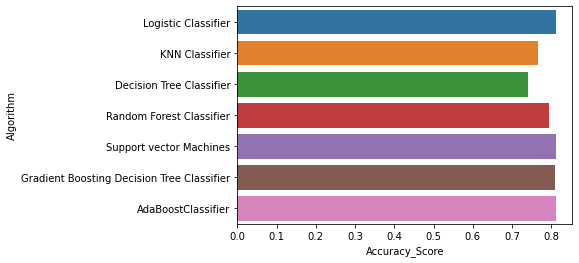

In [88]:
sns.barplot(y=ACCURACY.Algorithm,x=ACCURACY.Accuracy_Score)

# Conclution

* By observing the above plot We conclude that LogisticRegression is the best classifier for churn prediction
* And DecisionTreeClassifier is very poor in churn prediction